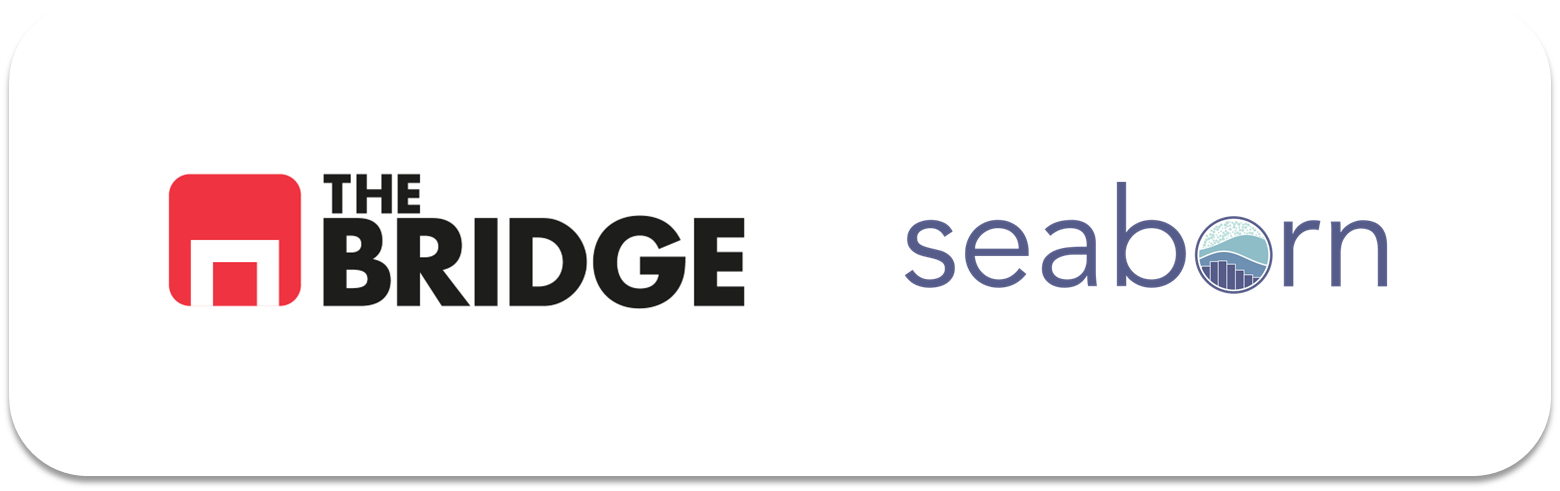

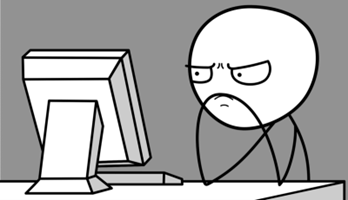

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv") # cargamos ambas bases de datos a nuestra mesa de trabajo.
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [3]:
df_bitcoin = pd.read_csv("./data/BTC.csv")
df_bitcoin["fechas"] = pd.to_datetime(df_bitcoin["date"])
df_bitcoin.set_index("fechas", inplace = True)  # Establecemos la columna "date" como index en el dataframe.
df_bitcoin.drop("date",axis = 1, inplace = True) # Eliminamos la columna de date ya que tenemos una creada que se llama "fecha" y nos muestra los datos de una manera más simple(Sin el "00:00:00")
df_bitcoin.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
fechas,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [4]:

def graficar_frecuencias_absolutas(df, columnas):
    """
    Dibuja diagramas de barras de frecuencias absolutas para columnas categóricas.

    Parámetros:
    - df: DataFrame de pandas.
    - columnas: Lista de nombres de columnas categóricas del DataFrame.
    """
    num_columnas = 2                                               # Establecemos el número de columnas que queremos pintar
    num_graficas = len(columnas)                                   # El numero de gráficas que vamos a mostrar se establece mediante el número de columnas que vamos indicarle como parámetro de la función. 
    num_filas = (num_graficas + num_columnas - 1) // num_columnas  # División entera redondeando hacia arriba. Establecemos el tamaño de la figura en base al número de gráficas.

    fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(12, 5 * num_filas)) # Pintamos la figura y usamos "plt.subplots"(nrows = numero de filas) lo va calculando a partir de los argumentos al llamar la fución.Lo mismo con el nº de columnas.
    axes = axes.flatten()                                                                      # Con Figsize establecemosel tamaño en pulgadas de nuestra fig. La manera de ajustarlo al número de filas es mediante "5 * num_filas"

    for i, col in enumerate(columnas): # Con el bucle for conseguimos que por cada columna categórica, nos pinte un gráfico de barras en el subplot correspondiente. "Enumerate" nos devuelve "indice: 0,1,2,3" y "col" el nombre de la columna.
        sns.countplot(data=df, x=col, ax=axes[i]) # Nos crea un gráfico de barras. "Data = df" Nos indica la procedencia de los datos. "x = col" Hace que se use la columna "col" como eje x. ¿Dónde se dibujo el subplot? En su lugar correspondiente"ax=axes[i]".
        axes[i].set_title(f"Frecuencias Absolutas de {col}") # Estalecemos el título el gráfico y "automatizamos" a la hora de hacer referencia a qué columna nos referimos con f"Frecuencias Absolutas de {col}"
        axes[i].set_xlabel("") # Eliminamos el titulo del eje x
        axes[i].set_ylabel("Frecuencia") # Establecemos el título del eje y
        axes[i].tick_params(axis='x', rotation=45) # Rotamos las etiquetas del eje x 45 grados para que no se sobrepongan.

    # Elimina los subplots sobrantes si los hay
    for j in range(i + 1, len(axes)): # Si por ejemplo hacemos 3 subplots , se nos mostrarán 4 representaciones de las cuales 1 estará vacía. COnseguimos con este bucle for eliminar ese hueco vacío.
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


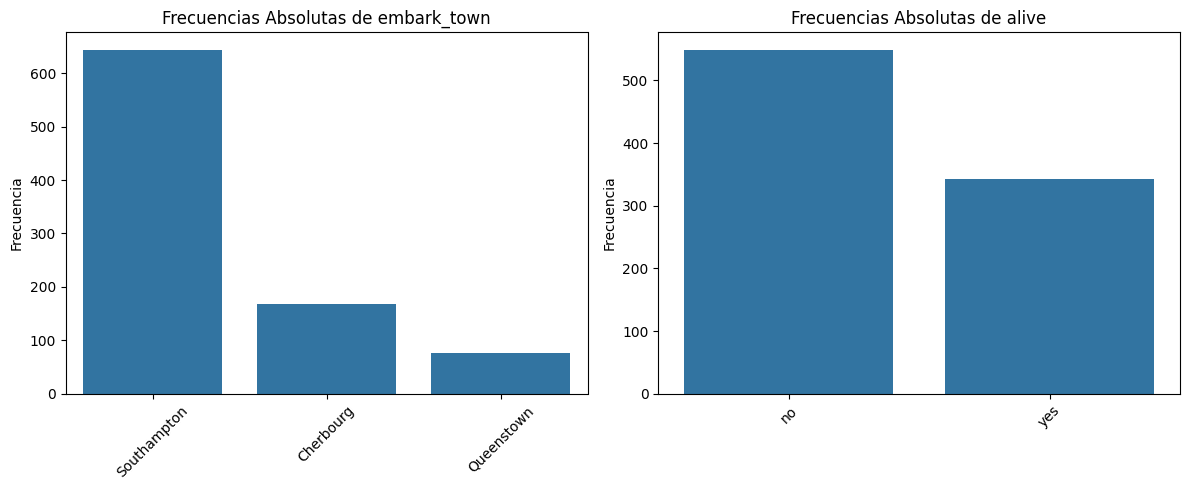

In [5]:
graficar_frecuencias_absolutas( df_titanic,columnas= ["embark_town","alive"])

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [6]:

def graficar_histogramas(df, columnas, bins_lista, incluir_densidad=False):
    """
    Dibuja histogramas para columnas numéricas de un DataFrame.

    Parámetros:
    - df: DataFrame de pandas.
    - columnas: Lista de nombres de columnas numéricas.
    - bins: Número de intervalos del histograma (por defecto 10).
    - incluir_densidad: Booleano para incluir o no la curva de densidad (kde).
    """

    if len(columnas) != len(bins_lista):
        raise ValueError("La lista de columnas y la lista de bins deben tener la misma longitud.") # Señalamos que la longitud del campo columnas debe ser igual a la longitud de bins_lista. De no ser así nos saltará el mensaje de ValueError.
    
    num_columnas = 2 # Establecemos qué valores predeterminados dentrá nuestra función para pintar histogramas . En este caso 2 columnas.
    num_graficas = len(columnas) # número de gráficas 
    num_filas = (num_graficas + num_columnas - 1) // num_columnas  # redondeo hacia arriba del número de filas que tendrá el plot 

    fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(12, 5 * num_filas)) # Creamos la figura y sus ejes mediante fig, axes = plt.subplot"S".
    axes = axes.flatten()

    for i, (col, bins) in enumerate(zip(columnas, bins_lista)):
        sns.histplot(data=df, x=col, bins=bins, kde=incluir_densidad, ax=axes[i])# pintamos un histograma con los datos establecidos en el parámetro df de la función. "x=col" lo establecemos en el eje X (aquí irán la categórica de la columna). kde = incluir_densidad
        axes[i].set_title(f"Histograma de {col} ({bins} bins)")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia" if not incluir_densidad else "Densidad")
    # Elimina subplots sobrantes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

In [7]:
df_viajes.columns

Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes'],
      dtype='object')

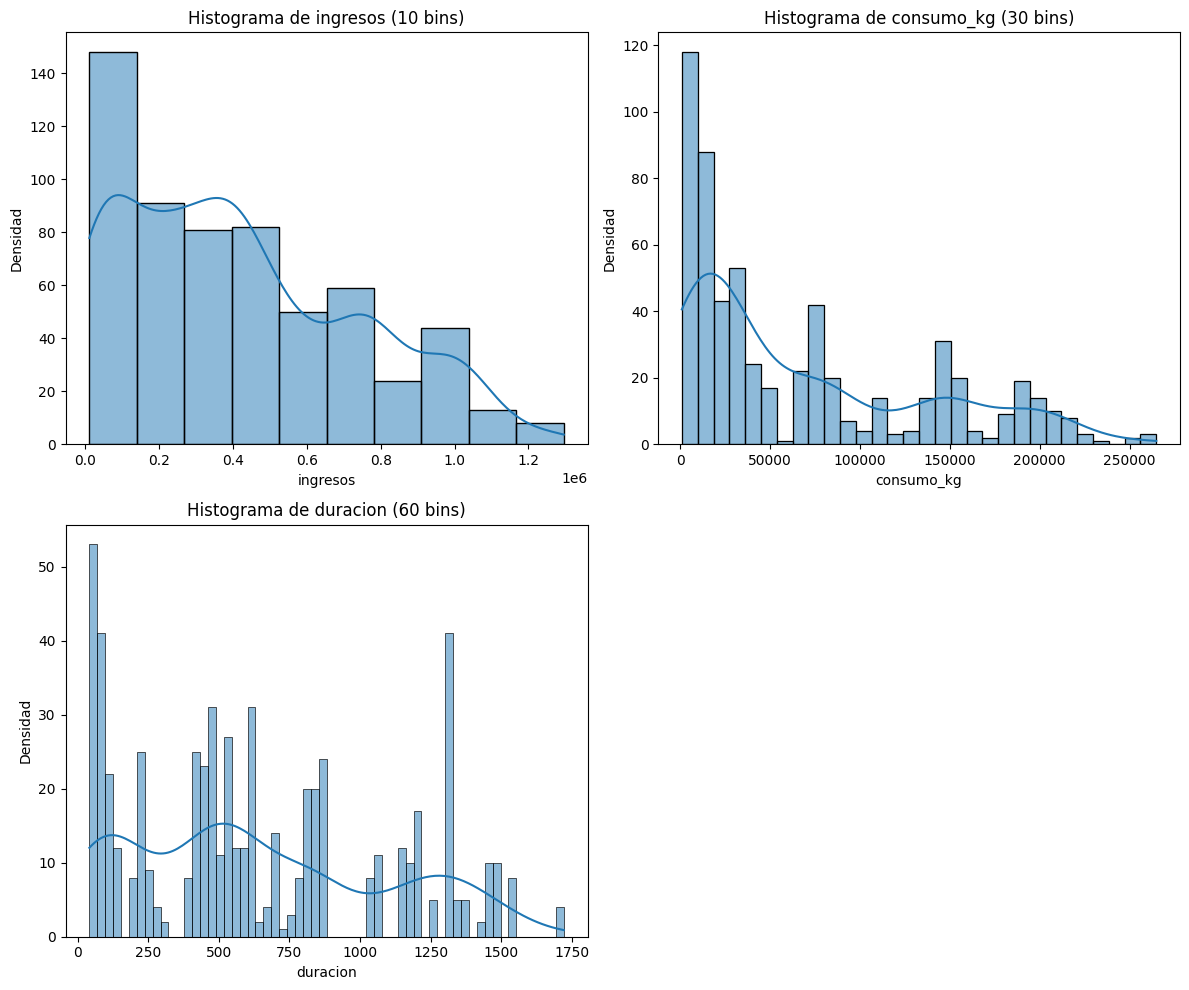

In [8]:
graficar_histogramas(df_viajes,(["ingresos","consumo_kg","duracion"]),bins_lista=[10,30,60],incluir_densidad=True)

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [9]:

def graficar_series(df, columnas):
    """
    Dibuja gráficas de líneas para una lista de columnas numéricas del DataFrame.

    Parámetros:
    - df: DataFrame de pandas.
    - columnas: Lista de nombres de columnas numéricas (series o secuencias).
    """
    num_columnas = 2
    num_graficas = len(columnas)
    num_filas = (num_graficas + num_columnas - 1) // num_columnas

    fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(12, 4 * num_filas)) # Establecemos el tamaño de nuestra figura
    axes = axes.flatten()

    for i, col in enumerate(columnas):      # por cada componente en el lugar del parámetro "columnas", es decir ,por cada nombre de la columna que le digamos a la función, nos pintará un lineplot
        sns.lineplot(data=df[col], ax=axes[i])
        axes[i].set_title(f"Serie temporal de {col}") # establecemos los titulos de cada zona de nuetra figura como los ejes tanto "x" como "y".
        axes[i].set_xlabel("Índice")
        axes[i].set_ylabel(col)

    # Elimina subplots vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

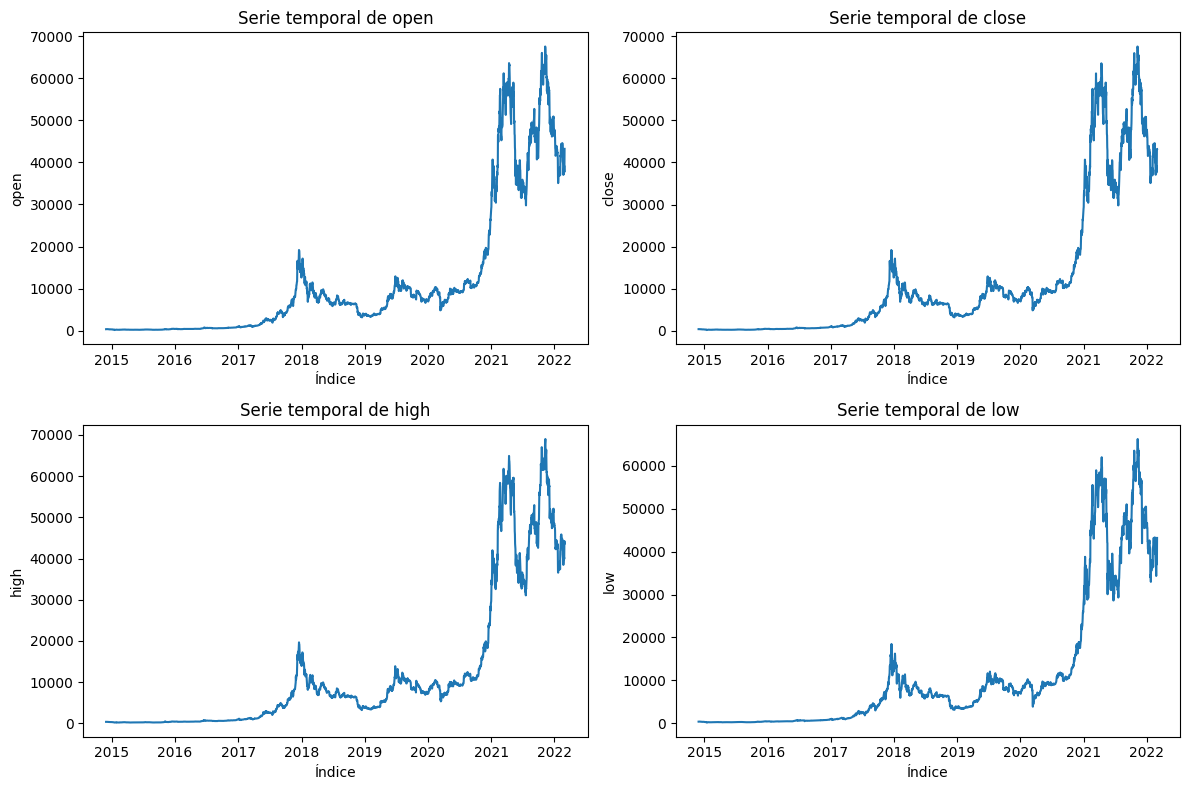

In [10]:
graficar_series(df_bitcoin,["open","close","high","low"])


### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [15]:

def graficar_series_temporales(df, columnas, una_sola_figura=False, fecha_inicio=None, fecha_fin=None):
    """
    Objetivo : 
    - Dibuja gráficas de series temporales.

    Parámetros:
    - df: DataFrame con índice de fechas.
    - columnas: Lista de columnas numéricas.
    - una_sola_figura: Si True, dibuja todas las series en una sola figura.
    - fecha_inicio: Fecha inicial como string o datetime (opcional).
    - fecha_fin: Fecha final como string o datetime (opcional).
    """

    # Filtrado por fecha si es necesario
    if fecha_inicio is not None:  # si el argumento de la función no es nulo...
        df = df[df.index >= fecha_inicio] # seleccionamos el dataframe a partir de la fecha indicada
    if fecha_fin is not None:    # si el argumento de la función NO es nulo...
        df = df[df.index <= fecha_fin] # seleccionamos el dataframe hasta la fecha indicada.

    if una_sola_figura: # si ponemos True en el argumento de una sola figura....
        plt.figure(figsize=(14, 7)) # pintamos una figura de esas dimensiones
        for col in columnas: # por cada valor que aparezca en el argumento columnas de nuestra función...
            sns.lineplot(data=df, x=df.index, y=col, label=col)  # pintar mediante seaborn una serie temporal itilizando los datos establecidos en el primer parámetro de la función, utilizar el indice como eje x "fecha"
        plt.title("Series temporales combinadas") # establecemos los titulos de los ejes.
        plt.xlabel("Fecha")
        plt.ylabel("Valor")
        plt.legend()
        plt.tight_layout() # ajustamos para que no se superpongan los titulos o los textos de nuestra gráfica
        plt.show()
    else:  # Si no decimos nada en los argumentos anteriores de nuestra función.... PINTAMOS LOS SUBPLOTS POR SEPARADO.
        # Subplots separados
        num_columnas = 2
        num_graficas = len(columnas)
        num_filas = (num_graficas + num_columnas - 1) // num_columnas

        fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(12, 4 * num_filas))
        axes = axes.flatten()

        for i, col in enumerate(columnas):
            sns.lineplot(x=df.index, y=df[col], ax=axes[i])
            axes[i].set_title(f"Serie temporal de {col}")
            axes[i].set_xlabel("Fecha")
            axes[i].set_ylabel(col)

        # Eliminar subplots sobrantes
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()



### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

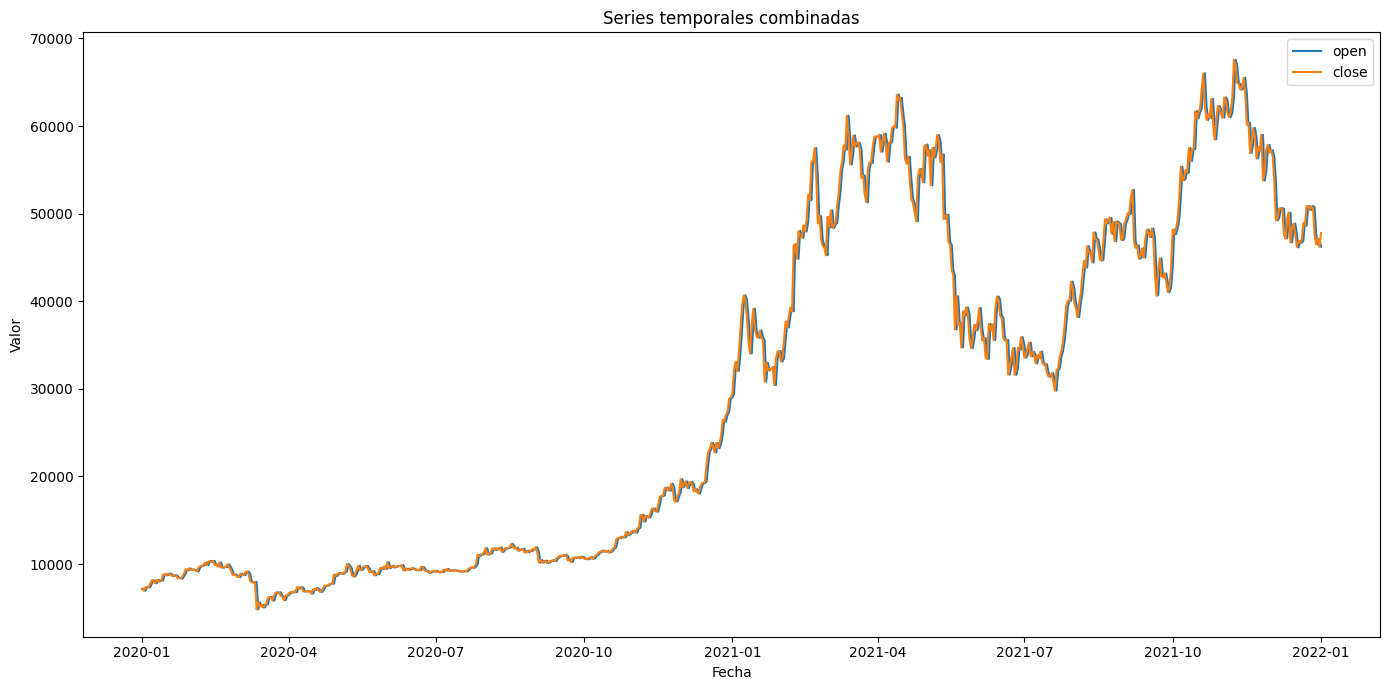

In [18]:
graficar_series_temporales(df_bitcoin,["open","close"],una_sola_figura=True,fecha_inicio="2020",fecha_fin="2022")
